In [99]:
import os 
os.getcwd()
import numpy as np
import sklearn.preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Clean data
import re

In [100]:
def look_n_load(path):
    df = pd.read_csv(path)
    print('\nShape:', df.shape)
    print('\nColumns:', list(df.columns))
#     print('\n',df.describe())
    print('\nMissing proportions:\n', df.isna().sum()/len(df))
    return df

In [101]:
# ! ls /Users/amalseby/Desktop/IN

In [102]:
# medrecon = look_n_load('/Users/amalseby/Desktop/IN/medrecon.csv')
# medrecon.head()

In [103]:
# medrecon = look_n_load('medrecon.csv')
# medrecon.head()

In [104]:
# pyxis = look_n_load('/Users/amalseby/Desktop/IN/pyxis.csv')
# pyxis.head()

In [105]:
# pyxis = look_n_load('pyxis.csv')
# pyxis.head()

In [106]:
# triage = look_n_load('/Users/amalseby/Desktop/IN/triage.csv')
# triage.head()

In [107]:
triage = look_n_load('triage.csv')
triage.head()


Shape: (447712, 11)

Columns: ['subject_id', 'stay_id', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity', 'chiefcomplaint']

Missing proportions:
 subject_id        0.000000
stay_id           0.000000
temperature       0.054935
heartrate         0.040111
resprate          0.047743
o2sat             0.048355
sbp               0.042941
dbp               0.044823
pain              0.030415
acuity            0.016368
chiefcomplaint    0.000051
dtype: float64


,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [108]:
# vitalsign = look_n_load('/Users/amalseby/Desktop/IN/vitalsign.csv')
# vitalsign.head()

In [109]:
vitalsign = look_n_load('vitalsign.csv')
vitalsign.head()


Shape: (1646976, 11)

Columns: ['subject_id', 'stay_id', 'charttime', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'rhythm', 'pain']

Missing proportions:
 subject_id     0.000000
stay_id        0.000000
charttime      0.000000
temperature    0.360779
heartrate      0.044546
resprate       0.057115
o2sat          0.086914
sbp            0.051936
dbp            0.051936
rhythm         0.961874
pain           0.283495
dtype: float64


,subject_id,stay_id,charttime,temperature,heartrate,resprate,o2sat,sbp,dbp,rhythm,pain
0,10000032,32952584,2180-07-22 16:36:00,NaN,83.0,24.0,97.0,90.0,51.0,NaN,0
1,10000032,32952584,2180-07-22 16:43:00,NaN,85.0,22.0,98.0,76.0,39.0,NaN,0
2,10000032,32952584,2180-07-22 16:45:00,NaN,84.0,22.0,97.0,75.0,39.0,NaN,0
3,10000032,32952584,2180-07-22 17:56:00,NaN,84.0,20.0,99.0,86.0,51.0,NaN,NaN
4,10000032,32952584,2180-07-22 18:37:00,98.4,86.0,20.0,98.0,65.0,37.0,NaN,NaN


In [110]:
# edstays = look_n_load('/Users/amalseby/Desktop/IN/edstays.csv')
# edstays.head()

In [111]:
edstays = look_n_load('edstays.csv')
edstays.head()


Shape: (447712, 9)

Columns: ['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'gender', 'race', 'arrival_transport', 'disposition']

Missing proportions:
 subject_id           0.000000
hadm_id              0.522213
stay_id              0.000000
intime               0.000000
outtime              0.000000
gender               0.000000
race                 0.000000
arrival_transport    0.000000
disposition          0.000000
dtype: float64


,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition
0,10000032,22595853.0,33258284,6/5/2180 19:17,6/5/2180 23:30,F,WHITE,AMBULANCE,ADMITTED
1,10000032,22841357.0,38112554,26/6/2180 15:54,26/6/2180 21:31,F,WHITE,AMBULANCE,ADMITTED
2,10000032,25742920.0,35968195,5/8/2180 20:58,6/8/2180 1:44,F,WHITE,AMBULANCE,ADMITTED
3,10000032,29079034.0,32952584,22/7/2180 16:24,23/7/2180 5:54,F,WHITE,AMBULANCE,HOME
4,10000032,29079034.0,39399961,23/7/2180 5:54,23/7/2180 14:00,F,WHITE,AMBULANCE,ADMITTED


In [112]:
# diagnosis = look_n_load('/Users/amalseby/Desktop/IN/diagnosis.csv')

In [113]:
diagnosis = look_n_load('diagnosis.csv')
diagnosis.head()


Shape: (946692, 6)

Columns: ['subject_id', 'stay_id', 'seq_num', 'icd_code', 'icd_version', 'icd_title']

Missing proportions:
 subject_id     0.0
stay_id        0.0
seq_num        0.0
icd_code       0.0
icd_version    0.0
icd_title      0.0
dtype: float64


,subject_id,stay_id,seq_num,icd_code,icd_version,icd_title
0,10000032,32952584,1,4589,9,HYPOTENSION NOS
1,10000032,32952584,2,7070,9,UNSPECIFIED VIRAL HEPATITIS C WITHOUT HEPATIC ...
2,10000032,32952584,3,V08,9,ASYMPTOMATIC HIV INFECTION
3,10000032,33258284,1,5728,9,"OTH SEQUELA, CHR LIV DIS"
4,10000032,33258284,2,78959,9,OTHER ASCITES


In [114]:
# creating hours column of for lenght of stay
if type(edstays['intime'][0]) == type('str'): 
    edstays['intime'] = pd.to_datetime(edstays['intime'])
    edstays['outtime'] = pd.to_datetime(edstays['outtime'])

    edstays['difftime'] = edstays['outtime'] - edstays['intime']
    edstays['nights'] = [x.days for x in edstays.difftime]
    edstays['hours'] = [round(x.total_seconds() / 60 / 60, 1) for x in edstays.difftime]

    # need to ensure exact time of dishcarge has been maintained and only the date ambiguated 
    edstays['discharge_hour'] = [x.hour for x in edstays.outtime]
    edstays['admission_hour'] = [x.hour for x in edstays.intime]

    edstays['admission_date'] = [x.date() for x in edstays.intime]
    edstays['admission_day'] = [x.day for x in edstays.intime]

patients_seen = pd.DataFrame(edstays['admission_date'].value_counts()).reset_index()
patients_seen = patients_seen.rename(columns={'index':'admission_date', 'admission_date':'patients_seen'})

edstays
# # overnight stays, not just hours

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,difftime,nights,hours,discharge_hour,admission_hour,admission_date,admission_day
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00,0,4.2,23,19,2180-06-05,5
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0 days 05:37:00,0,5.6,21,15,2180-06-26,26
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,30 days 04:46:00,30,724.8,1,20,2180-05-08,8
3,10000032,29079034.0,32952584,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,0 days 13:30:00,0,13.5,5,16,2180-07-22,22
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,0 days 08:06:00,0,8.1,14,5,2180-07-23,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447707,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 06:48:00,0,6.8,21,14,2119-06-18,18
447708,19999828,25744818.0,32917002,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00,0,9.0,18,9,2149-08-01,1
447709,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1 days 00:16:00,1,24.3,17,17,2147-07-17,17
447710,19999914,NaN,32002659,2158-12-24 11:41:00,2158-12-24 11:56:00,F,UNKNOWN,UNKNOWN,ELOPED,0 days 00:15:00,0,0.2,11,11,2158-12-24,24


In [115]:
# Looking for values where person is either admitted or transferred for lenght of stay
res=edstays[(edstays.disposition == "ADMITTED") | (edstays.disposition == 'TRANSFER')]
res

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,difftime,nights,hours,discharge_hour,admission_hour,admission_date,admission_day
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00,0,4.2,23,19,2180-06-05,5
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0 days 05:37:00,0,5.6,21,15,2180-06-26,26
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,30 days 04:46:00,30,724.8,1,20,2180-05-08,8
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,0 days 08:06:00,0,8.1,14,5,2180-07-23,23
5,10000084,23052089.0,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,WHITE,WALK IN,ADMITTED,0 days 06:44:00,0,6.7,3,20,2160-11-20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447706,19999784,25715748.0,34149746,2119-11-08 09:15:00,2119-11-08 13:40:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 04:25:00,0,4.4,13,9,2119-11-08,8
447707,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 06:48:00,0,6.8,21,14,2119-06-18,18
447708,19999828,25744818.0,32917002,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00,0,9.0,18,9,2149-08-01,1
447709,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1 days 00:16:00,1,24.3,17,17,2147-07-17,17


In [116]:
max = res['hours'].max()

In [117]:

# removed negative hours. grouped length of stay column as stay(hours)
# for predicting
res.loc[res['hours'].between(0,3), 'stay'] = '0-3 '
res.loc[res['hours'].between(3.1,6), 'stay'] = '3-6 '
res.loc[res['hours'].between(6.1,9), 'stay'] = '6-9 '
res.loc[res['hours'].between(9.1,12), 'stay'] = '9-12 '
res.loc[res['hours'].between(12.1,15), 'stay'] = '12-15 '
res.loc[res['hours'].between(15.1,18), 'stay'] = '15-18 '
res.loc[res['hours'].between(18.1,21), 'stay'] = '18-21 '
res.loc[res['hours']>21, 'stay'] = f'21-{max}'

/var/folders/xk/hgz_3qtx1nnfdktnhybr14k80000gn/T/ipykernel_7942/2457313632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res.loc[res['hours'].between(0,3), 'stay'] = '0-3 '


In [118]:
res

,subject_id,hadm_id,stay_id,intime,outtime,gender,race,arrival_transport,disposition,difftime,nights,hours,discharge_hour,admission_hour,admission_date,admission_day,stay
0,10000032,22595853.0,33258284,2180-06-05 19:17:00,2180-06-05 23:30:00,F,WHITE,AMBULANCE,ADMITTED,0 days 04:13:00,0,4.2,23,19,2180-06-05,5,3-6
1,10000032,22841357.0,38112554,2180-06-26 15:54:00,2180-06-26 21:31:00,F,WHITE,AMBULANCE,ADMITTED,0 days 05:37:00,0,5.6,21,15,2180-06-26,26,3-6
2,10000032,25742920.0,35968195,2180-05-08 20:58:00,2180-06-08 01:44:00,F,WHITE,AMBULANCE,ADMITTED,30 days 04:46:00,30,724.8,1,20,2180-05-08,8,21-4394.6
4,10000032,29079034.0,39399961,2180-07-23 05:54:00,2180-07-23 14:00:00,F,WHITE,AMBULANCE,ADMITTED,0 days 08:06:00,0,8.1,14,5,2180-07-23,23,6-9
5,10000084,23052089.0,35203156,2160-11-20 20:36:00,2160-11-21 03:20:00,M,WHITE,WALK IN,ADMITTED,0 days 06:44:00,0,6.7,3,20,2160-11-20,20,6-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447706,19999784,25715748.0,34149746,2119-11-08 09:15:00,2119-11-08 13:40:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 04:25:00,0,4.4,13,9,2119-11-08,8,3-6
447707,19999784,26194817.0,35692999,2119-06-18 14:21:00,2119-06-18 21:09:00,M,BLACK/AFRICAN AMERICAN,WALK IN,ADMITTED,0 days 06:48:00,0,6.8,21,14,2119-06-18,18,6-9
447708,19999828,25744818.0,32917002,2149-08-01 09:11:00,2149-08-01 18:12:00,F,WHITE,AMBULANCE,ADMITTED,0 days 09:01:00,0,9.0,18,9,2149-08-01,1,6-9
447709,19999828,29734428.0,30712109,2147-07-17 17:18:00,2147-07-18 17:34:00,F,WHITE,WALK IN,ADMITTED,1 days 00:16:00,1,24.3,17,17,2147-07-17,17,21-4394.6


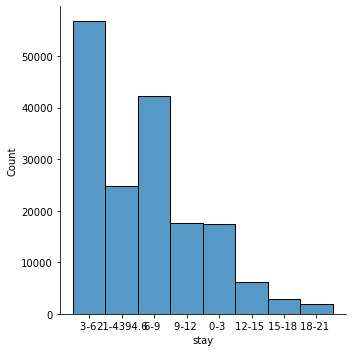

In [119]:
sns.displot(res, x="stay", binwidth=3)

<AxesSubplot:xlabel='stay', ylabel='Count'>

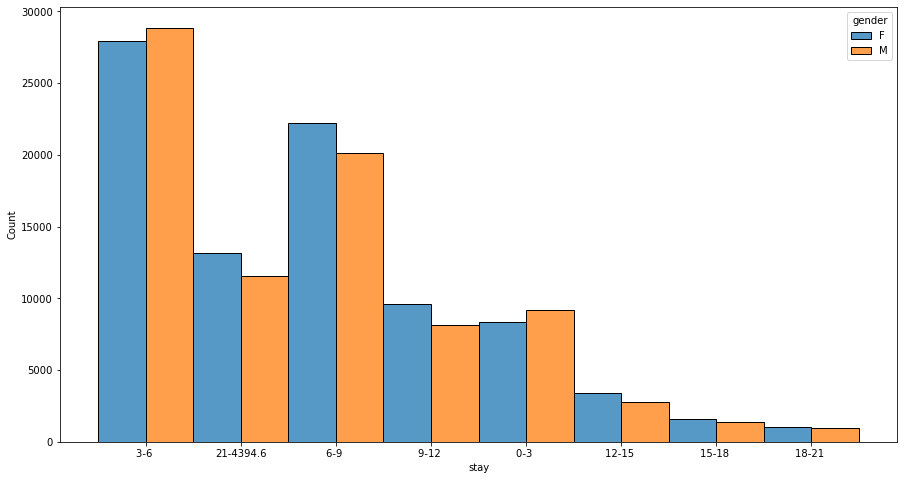

In [120]:
sns.histplot(binwidth=1,
            x="stay",
            hue="gender",
            data=res,
            stat="count",
            multiple="dodge")

In [121]:
res.columns

Index(['subject_id', 'hadm_id', 'stay_id', 'intime', 'outtime', 'gender',
       'race', 'arrival_transport', 'disposition', 'difftime', 'nights',
       'hours', 'discharge_hour', 'admission_hour', 'admission_date',
       'admission_day', 'stay'],
      dtype='object')

In [122]:
res['disposition'].value_counts()

ADMITTED    166303
TRANSFER      7436
Name: disposition, dtype: int64

In [123]:
res = res[['subject_id', 'stay_id', 'gender', 'race', 'arrival_transport', 'disposition', 'stay']]
res.head()

,subject_id,stay_id,gender,race,arrival_transport,disposition,stay
0,10000032,33258284,F,WHITE,AMBULANCE,ADMITTED,3-6
1,10000032,38112554,F,WHITE,AMBULANCE,ADMITTED,3-6
2,10000032,35968195,F,WHITE,AMBULANCE,ADMITTED,21-4394.6
4,10000032,39399961,F,WHITE,AMBULANCE,ADMITTED,6-9
5,10000084,35203156,M,WHITE,WALK IN,ADMITTED,6-9


In [124]:
triage.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [125]:
triage = triage[['subject_id', 'stay_id', 'temperature', 'heartrate', 'resprate', 'o2sat', 'sbp', 'dbp', 'pain', 'acuity',
                'chiefcomplaint']]
triage.head()

,subject_id,stay_id,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,32952584,97.8,87.0,14.0,97.0,71.0,43.0,7,2.0,Hypotension
1,10000032,33258284,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
2,10000032,35968195,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,38112554,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
4,10000032,39399961,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"


In [126]:
df = res.merge(triage, how='inner', on=['subject_id', 'stay_id'])
df.head()

,subject_id,stay_id,gender,race,arrival_transport,disposition,stay,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint
0,10000032,33258284,F,WHITE,AMBULANCE,ADMITTED,3-6,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention"
1,10000032,38112554,F,WHITE,AMBULANCE,ADMITTED,3-6,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention
2,10000032,35968195,F,WHITE,AMBULANCE,ADMITTED,21-4394.6,99.4,105.0,18.0,96.0,106.0,57.0,10,3.0,"n/v/d, Abd pain"
3,10000032,39399961,F,WHITE,AMBULANCE,ADMITTED,6-9,98.7,77.0,16.0,98.0,96.0,50.0,13,2.0,"Abdominal distention, Abd pain, LETHAGIC"
4,10000084,35203156,M,WHITE,WALK IN,ADMITTED,6-9,97.5,78.0,16.0,100.0,114.0,71.0,0,2.0,"Confusion, Hallucinations"


In [127]:
diagnosis = pd.read_csv('diagnosis.csv')
diagnosis = diagnosis[['subject_id', 'stay_id', 'icd_code']]
diagnosis.head()

,subject_id,stay_id,icd_code
0,10000032,32952584,4589
1,10000032,32952584,7070
2,10000032,32952584,V08
3,10000032,33258284,5728
4,10000032,33258284,78959


In [128]:
df = df.merge(diagnosis, how='inner', on=['subject_id', 'stay_id'])
df.head()

,subject_id,stay_id,gender,race,arrival_transport,disposition,stay,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,chiefcomplaint,icd_code
0,10000032,33258284,F,WHITE,AMBULANCE,ADMITTED,3-6,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",5728
1,10000032,33258284,F,WHITE,AMBULANCE,ADMITTED,3-6,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",78959
2,10000032,33258284,F,WHITE,AMBULANCE,ADMITTED,3-6,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",7070
3,10000032,33258284,F,WHITE,AMBULANCE,ADMITTED,3-6,98.4,70.0,16.0,97.0,106.0,63.0,0,3.0,"Abd pain, Abdominal distention",V08
4,10000032,38112554,F,WHITE,AMBULANCE,ADMITTED,3-6,98.9,88.0,18.0,97.0,116.0,88.0,10,3.0,Abdominal distention,78959


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345499 entries, 0 to 345498
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   subject_id         345499 non-null  int64  
 1   stay_id            345499 non-null  int64  
 2   gender             345499 non-null  object 
 3   race               345499 non-null  object 
 4   arrival_transport  345499 non-null  object 
 5   disposition        345499 non-null  object 
 6   stay               338482 non-null  object 
 7   temperature        310256 non-null  float64
 8   heartrate          317535 non-null  float64
 9   resprate           313618 non-null  float64
 10  o2sat              313734 non-null  float64
 11  sbp                316961 non-null  float64
 12  dbp                316115 non-null  float64
 13  pain               323924 non-null  object 
 14  acuity             332879 non-null  float64
 15  chiefcomplaint     345486 non-null  object 
 16  ic

In [130]:
df.isna().sum()

subject_id               0
stay_id                  0
gender                   0
race                     0
arrival_transport        0
disposition              0
stay                  7017
temperature          35243
heartrate            27964
resprate             31881
o2sat                31765
sbp                  28538
dbp                  29384
pain                 21575
acuity               12620
chiefcomplaint          13
icd_code                 0
dtype: int64

In [131]:
len(df)

345499

In [132]:
df = df.dropna()
len(df)

291425

In [133]:
df.drop(columns=['pain'], inplace=True)

In [134]:
df.columns

Index(['subject_id', 'stay_id', 'gender', 'race', 'arrival_transport',
       'disposition', 'stay', 'temperature', 'heartrate', 'resprate', 'o2sat',
       'sbp', 'dbp', 'acuity', 'chiefcomplaint', 'icd_code'],
      dtype='object')

In [135]:
df['Stay'] = df['stay']

In [136]:
df.drop(columns=['stay', 'chiefcomplaint', 'subject_id', 'stay_id','icd_code'], inplace=True)

In [137]:
df.head()

,gender,race,arrival_transport,disposition,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,Stay
0,F,WHITE,AMBULANCE,ADMITTED,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
1,F,WHITE,AMBULANCE,ADMITTED,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
2,F,WHITE,AMBULANCE,ADMITTED,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
3,F,WHITE,AMBULANCE,ADMITTED,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
4,F,WHITE,AMBULANCE,ADMITTED,98.9,88.0,18.0,97.0,116.0,88.0,3.0,3-6


In [138]:
from sklearn.preprocessing import LabelEncoder

In [139]:
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['race'] = le.fit_transform(df['race'])
df['arrival_transport'] = le.fit_transform(df['arrival_transport'])
df['disposition'] = le.fit_transform(df['disposition'])


In [140]:
df.head()

,gender,race,arrival_transport,disposition,temperature,heartrate,resprate,o2sat,sbp,dbp,acuity,Stay
0,0,28,0,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
1,0,28,0,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
2,0,28,0,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
3,0,28,0,0,98.4,70.0,16.0,97.0,106.0,63.0,3.0,3-6
4,0,28,0,0,98.9,88.0,18.0,97.0,116.0,88.0,3.0,3-6


In [141]:
X = df.iloc[:, :-1].values

In [142]:
y = df.iloc[:, -1].values

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [145]:
from sklearn.ensemble import RandomForestClassifier

In [146]:
rfc = RandomForestClassifier(n_estimators=150, max_features='auto', random_state=101)

In [147]:
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150, random_state=101)

In [148]:
preds=rfc.predict(X_test)

In [149]:
preds

array(['6-9 ', '3-6 ', '9-12 ', ..., '6-9 ', '0-3 ', '6-9 '], dtype=object)

In [150]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

In [151]:
plt.rcParams["figure.figsize"] = (15,8)

/Users/amalseby/opt/anaconda3/envs/cits5508-2022/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


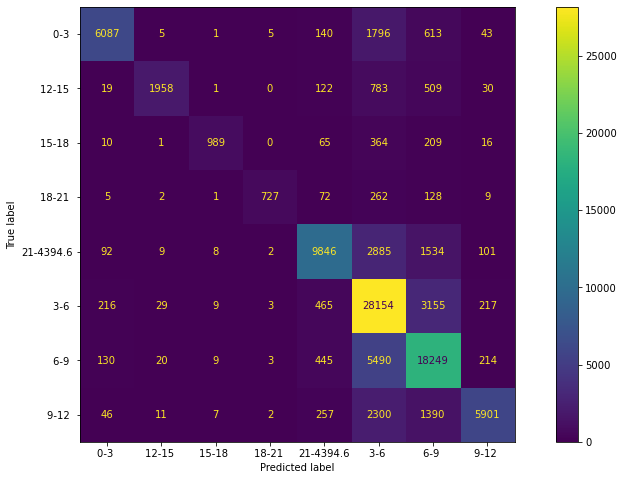

In [152]:
plot_confusion_matrix(rfc, X_test, y_test)

In [153]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

        0-3        0.92      0.70      0.80      8690
      12-15        0.96      0.57      0.72      3422
      15-18        0.96      0.60      0.74      1654
      18-21        0.98      0.60      0.75      1206
   21-4394.6       0.86      0.68      0.76     14477
        3-6        0.67      0.87      0.76     32248
        6-9        0.71      0.74      0.72     24560
       9-12        0.90      0.60      0.72      9914

    accuracy                           0.75     96171
   macro avg       0.87      0.67      0.74     96171
weighted avg       0.77      0.75      0.75     96171



Text(0.5, 0, 'Feature Importance')

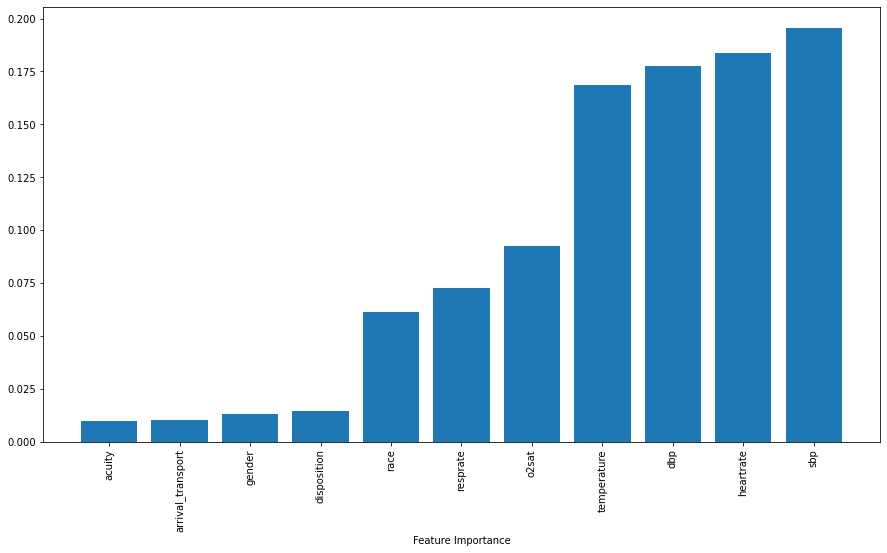

In [154]:
sort = rfc.feature_importances_.argsort()
plt.bar(df.columns[sort], rfc.feature_importances_[sort])
plt.xticks(rotation=90)
plt.xlabel("Feature Importance")